In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
city_df = pd.read_csv('data/city_ranking.csv')
city_df.head(5)

,city,country,Employment Score,Startup Score,Tourism Score,Housing Score,Food Ranking,Transport Score,Health Rank,Internet Speed Score,University Score,Access to Contraceptive Score,Gender Equality Score,Immigration Tolerence,Personal Freedom and Choice,LGBT friendly Score,Nightlife Score,Beer Ranking,Festival Ranking,Total
0,Berlin,Germany,4.8,9.0,6.2,5.2,7.2,7.1,3.9,5.0,4.9,6.9,7.5,8.4,7.8,9.7,10.0,7.0,8.0,7.14
1,Montréal,Canada,6.0,8.1,5.7,6.4,5.1,3.6,7.4,5.1,5.8,8.6,7.0,9.9,8.1,9.6,8.8,5.1,9.0,7.10
2,London,United Kingdom,6.6,9.8,9.8,0.5,2.2,7.2,4.4,4.7,10.0,9.5,7.1,8.7,9.6,9.4,9.4,2.5,7.5,6.71
3,Amsterdam,Netherlands,7.6,8.3,8.7,0.6,1.7,5.7,6.9,4.5,5.0,7.9,5.5,8.5,10.0,9.9,8.6,4.8,9.7,6.63
4,Toronto,Canada,6.3,9.5,4.4,2.7,6.1,4.3,7.4,7.1,5.2,8.6,7.0,9.9,9.4,9.8,4.5,3.6,9.4,6.60


In [3]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   city                           110 non-null    object 
 1   country                        110 non-null    object 
 2   Employment Score               110 non-null    float64
 3   Startup Score                  110 non-null    float64
 4   Tourism Score                  110 non-null    float64
 5   Housing Score                  110 non-null    float64
 6   Food Ranking                   110 non-null    float64
 7   Transport Score                110 non-null    float64
 8   Health Rank                    110 non-null    float64
 9   Internet Speed Score           110 non-null    float64
 10  University Score               110 non-null    float64
 11  Access to Contraceptive Score  110 non-null    float64
 12  Gender Equality Score          110 non-null    flo

In [4]:
city_df.isna().sum() #city_df.isnull().sum()
# there are no missing values. I guess the company that owns the data already cleaned it before publihing on their website.

city                             0
country                          0
Employment Score                 0
Startup Score                    0
Tourism Score                    0
Housing Score                    0
Food Ranking                     0
Transport Score                  0
Health Rank                      0
Internet Speed Score             0
University Score                 0
Access to Contraceptive Score    0
Gender Equality Score            0
Immigration Tolerence            0
Personal Freedom and Choice      0
LGBT friendly Score              0
Nightlife Score                  0
Beer Ranking                     0
Festival Ranking                 0
Total                            0
dtype: int64

In [5]:
city_df.describe()

,Employment Score,Startup Score,Tourism Score,Housing Score,Food Ranking,Transport Score,Health Rank,Internet Speed Score,University Score,Access to Contraceptive Score,Gender Equality Score,Immigration Tolerence,Personal Freedom and Choice,LGBT friendly Score,Nightlife Score,Beer Ranking,Festival Ranking,Total
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,4.972727,4.994545,5.000000,5.000909,5.000909,4.304545,4.841818,4.992727,3.580000,7.210909,5.416364,7.236364,4.914545,5.000000,4.992727,5.067273,4.517273,5.125545
std,2.909646,2.931037,2.922705,2.922343,2.924101,2.232183,2.924850,2.925676,2.496706,1.982647,2.031429,2.408423,2.918302,2.922705,2.926585,2.926284,3.169026,0.780482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.210000
25%,2.500000,2.525000,2.525000,2.525000,2.525000,2.700000,1.900000,2.525000,1.000000,6.900000,4.100000,6.600000,2.525000,2.525000,2.525000,2.425000,0.700000,4.695000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,4.250000,4.400000,5.000000,3.500000,7.500000,5.250000,8.300000,5.000000,5.000000,5.000000,5.100000,4.400000,5.185000
75%,7.450000,7.475000,7.475000,7.475000,7.475000,6.000000,7.400000,7.475000,5.375000,8.400000,7.100000,8.700000,7.200000,7.475000,7.475000,7.475000,7.275000,5.632500
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.140000


In [6]:
city_df.duplicated().sum()
# no duplicates in all the columns. exluding index. 

0

## out of my curiosity, I wanted to know certain things about the overall data

 please note that all the conclusions in this file are purely based on this dataset. As all cities are not fully captured and the respondents are mainly millenials (2018 data), it does not really represent global through. Especially for countries, countries do no have equal representation, I will take the answers to the questions with a grain of salt.

 #### 1.  which country has the highest number of cities represented in the dataset

In [7]:
city_representation = city_df.groupby('country')['city'].count().sort_values(ascending=False).head(7)
city_representation

country
USA               12
France             8
United Kingdom     7
Australia          6
Spain              5
Netherlands        5
Canada             5
Name: city, dtype: int64

Text(0.5, 0, 'countries')

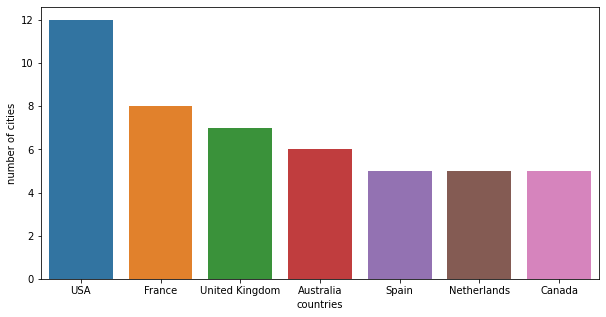

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x=city_representation.index, y=city_representation)
plt.ylabel('number of cities')
plt.xlabel('countries')

 #### 2.  based on this data, which country has the best food rating

In [9]:
# note that i chose top use mean because each country does not have equal city representation
# otherwise, either sum or mean could work
# Asia and south america seems to the leadind the chart here
food_representation = city_df.groupby('country')['Food Ranking'].mean().sort_values(ascending=False).head(10)
food_representation

country
Thailand    10.000000
Malaysia     9.900000
Peru         9.800000
Colombia     9.650000
China        9.500000
Turkey       9.200000
Mexico       9.133333
Taiwan       9.100000
Romania      8.900000
Hungary      8.800000
Name: Food Ranking, dtype: float64

Text(0.5, 1.0, 'top countries with best food')

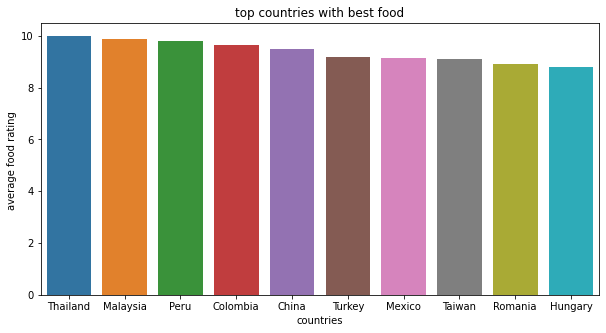

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x= food_representation.index, y=food_representation)
plt.ylabel('average food rating ')
plt.xlabel('countries')
plt.title('top countries with best food')

 #### 3.  based on this data, which country is most tolerant to foreigners 
 
 The same comment written for wuestion two is applicable here

In [11]:
immigration_representation = city_df.groupby('country')['Immigration Tolerence'].mean().sort_values(ascending=False).head(10)
immigration_representation

country
New Zealand       10.0
Canada             9.9
Norway             9.6
Ireland            9.4
Australia          9.3
Spain              8.8
United Kingdom     8.7
Sweden             8.7
Denmark            8.7
USA                8.5
Name: Immigration Tolerence, dtype: float64

Text(0.5, 0, 'countries')

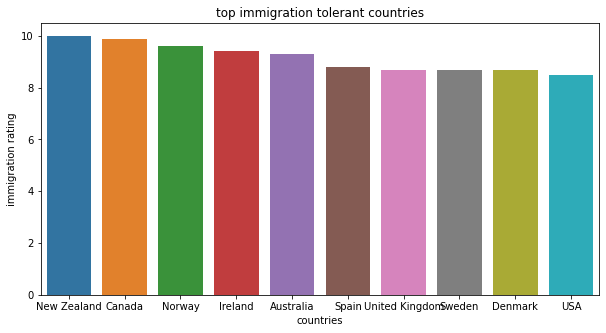

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x=immigration_representation.index, y=immigration_representation)
plt.title('top immigration tolerant countries')
plt.ylabel('immigration rating')
plt.xlabel('countries')

the kind of analyses above can be done for virtually every column above. I just wrote those two as a proof of concept
I will ask a different kind of question now

Given that certain features can be grouped for certain charactersistics, for example, i will define best recreational or social cities as those with Night life, good beer, good festival. so lets define others

### 4 based on this data, what are the most female friendly cities

In [13]:
#  defined_female_friendly_feature = contraceptive, gender equality, personal freedom and choice

In [14]:
# features always needed for calculations = city and country

In [15]:
city_df.columns

Index(['city', 'country', 'Employment Score', 'Startup Score', 'Tourism Score',
       'Housing Score', 'Food Ranking', 'Transport Score', 'Health Rank',
       'Internet Speed Score', 'University Score',
       'Access to Contraceptive Score', 'Gender Equality Score',
       'Immigration Tolerence', 'Personal Freedom and Choice',
       'LGBT friendly Score', 'Nightlife Score', 'Beer Ranking',
       'Festival Ranking', 'Total'],
      dtype='object')

In [16]:
 female_friendly_features = ['city', 'country', 'Access to Contraceptive Score', 
                             'Gender Equality Score','Personal Freedom and Choice']

In [17]:
female_friendly_df = city_df.loc[:, female_friendly_features]
female_friendly_df.head(5)

,city,country,Access to Contraceptive Score,Gender Equality Score,Personal Freedom and Choice
0,Berlin,Germany,6.9,7.5,7.8
1,Montréal,Canada,8.6,7.0,8.1
2,London,United Kingdom,9.5,7.1,9.6
3,Amsterdam,Netherlands,7.9,5.5,10.0
4,Toronto,Canada,8.6,7.0,9.4


In [18]:
female_friendly_df.set_index('city', inplace = True)
female_friendly_df.head(5)

,country,Access to Contraceptive Score,Gender Equality Score,Personal Freedom and Choice
city,,,,
Berlin,Germany,6.9,7.5,7.8
Montréal,Canada,8.6,7.0,8.1
London,United Kingdom,9.5,7.1,9.6
Amsterdam,Netherlands,7.9,5.5,10.0
Toronto,Canada,8.6,7.0,9.4


In [19]:
female_friendly_df['female_total'] = female_friendly_df.sum(axis=1)

In [20]:
female_friendly_df.head(5)

,country,Access to Contraceptive Score,Gender Equality Score,Personal Freedom and Choice,female_total
city,,,,,
Berlin,Germany,6.9,7.5,7.8,22.2
Montréal,Canada,8.6,7.0,8.1,23.7
London,United Kingdom,9.5,7.1,9.6,26.2
Amsterdam,Netherlands,7.9,5.5,10.0,23.4
Toronto,Canada,8.6,7.0,9.4,25.0


In [21]:
female_friendly_df.sort_values('female_total', ascending = False, inplace = True)
female_friendly_df
# Helsinki is the city that is most female friendly and really close behind are oslo ad bergen.

,country,Access to Contraceptive Score,Gender Equality Score,Personal Freedom and Choice,female_total
city,,,,,
Helsinki,Finland,8.4,9.7,9.8,27.9
Oslo,Norway,7.9,10.0,9.9,27.8
Bergen,Norway,7.9,10.0,9.3,27.2
London,United Kingdom,9.5,7.1,9.6,26.2
Manchester,United Kingdom,9.5,7.1,9.2,25.8
...,...,...,...,...,...
Rome,Italy,3.4,3.3,0.8,7.5
Bologna,Italy,3.4,3.3,0.8,7.5
Athens,Greece,1.3,3.3,0.1,4.7


In [22]:
top_20_female_friendly_city = female_friendly_df.female_total.head(20)
top_20_female_friendly_city

city
Helsinki       27.9
Oslo           27.8
Bergen         27.2
London         26.2
Manchester     25.8
Vancouver      25.3
Toronto        25.0
Wellington     24.6
Copenhagen     23.9
Bristol        23.8
Glasgow        23.8
Birmingham     23.8
Edinburgh      23.8
Coventry       23.8
Québec City    23.7
Ottawa         23.7
Montréal       23.7
Stockholm      23.6
Auckland       23.5
Amsterdam      23.4
Name: female_total, dtype: float64

In [23]:
# now, which country is more represented here
female_friendly_df_country = female_friendly_df.loc[top_20_female_friendly_city.index, 'country']
female_friendly_df_country 

city
Helsinki              Finland
Oslo                   Norway
Bergen                 Norway
London         United Kingdom
Manchester     United Kingdom
Vancouver              Canada
Toronto                Canada
Wellington        New Zealand
Copenhagen            Denmark
Bristol        United Kingdom
Glasgow        United Kingdom
Birmingham     United Kingdom
Edinburgh      United Kingdom
Coventry       United Kingdom
Québec City            Canada
Ottawa                 Canada
Montréal               Canada
Stockholm              Sweden
Auckland          New Zealand
Amsterdam         Netherlands
Name: country, dtype: object

In [24]:
female_friendly_df_country_df = female_friendly_df_country.reset_index().groupby('country').count().sort_values('city', ascending = False)

In [25]:
female_friendly_df_country_df
# apparently, UK is the most female friendly country based on this data. but this is a little biased as the countries dont have equal representation


,city
country,
United Kingdom,7
Canada,5
New Zealand,2
Norway,2
Denmark,1
Finland,1
Netherlands,1
Sweden,1


In [26]:
# lets try a different approach using the values of rank

In [27]:
top_20_female_friendly_city_df=female_friendly_df.loc[:, ['country', 'female_total']]
top_20_female_friendly_city_df.head(20)

,country,female_total
city,,
Helsinki,Finland,27.9
Oslo,Norway,27.8
Bergen,Norway,27.2
London,United Kingdom,26.2
Manchester,United Kingdom,25.8
Vancouver,Canada,25.3
Toronto,Canada,25.0
Wellington,New Zealand,24.6
Copenhagen,Denmark,23.9


In [28]:
proper_female_friendly_df_country_df = top_20_female_friendly_city_df.groupby('country').mean().sort_values('female_total', ascending=False)
proper_female_friendly_df_country_df = proper_female_friendly_df_country_df.head(20)
proper_female_friendly_df_country_df
# This looks like the proper countries. each cities are equally weighted here.BASED ON THIS, FINLAND WINS

,female_total
country,
Finland,27.900000
Norway,27.500000
United Kingdom,24.428571
Canada,24.280000
Denmark,23.900000
New Zealand,23.800000
Sweden,23.150000
Switzerland,23.000000
Netherlands,22.040000


In [29]:
city_df.columns

Index(['city', 'country', 'Employment Score', 'Startup Score', 'Tourism Score',
       'Housing Score', 'Food Ranking', 'Transport Score', 'Health Rank',
       'Internet Speed Score', 'University Score',
       'Access to Contraceptive Score', 'Gender Equality Score',
       'Immigration Tolerence', 'Personal Freedom and Choice',
       'LGBT friendly Score', 'Nightlife Score', 'Beer Ranking',
       'Festival Ranking', 'Total'],
      dtype='object')

In [30]:
# best for Business and companies = Employment Score, Startup Score, immigration tolerance 'Internet Speed Score', 'Transport Score'

In [31]:

# function to calculate top 20 cities for a particular defined feature


In [32]:

# needed = ['city', 'country']

# features = ['Access to Contraceptive Score', 'Gender Equality Score']
# features.extend(needed)

# # n = how many cities


def calculate_top_cities_for_defined_feature(features: list, n: int):
    feature_df = city_df.loc[:, features]
    feature_df.set_index('city', inplace = True)
    feature_df['score'] = feature_df.mean(axis=1)
    city_feature_df = feature_df.sort_values('score', ascending = False)
    top_city_feature_df = city_feature_df.loc[:, ['country','score']].head(n)
    return top_city_feature_df

def top_countries_based_selected_cities(top_city_feature_df):
    feature_countries_df= top_city_feature_df.loc[:, ['country', 'score']]
    feature_countries_df = feature_countries_df.groupby('country').mean()
    feature_countries_df = feature_countries_df.sort_values('score', ascending=False)
    return feature_countries_df

In [105]:
city_df.columns

Index(['city', 'country', 'Employment Score', 'Startup Score', 'Tourism Score',
       'Housing Score', 'Food Ranking', 'Transport Score', 'Health Rank',
       'Internet Speed Score', 'University Score',
       'Access to Contraceptive Score', 'Gender Equality Score',
       'Immigration Tolerence', 'Personal Freedom and Choice',
       'LGBT friendly Score', 'Nightlife Score', 'Beer Ranking',
       'Festival Ranking', 'Total'],
      dtype='object')

In [106]:
needed = ['city', 'country']

features = ['Startup Score', 'Gender Equality Score', 'Personal Freedom and Choice', 'Nightlife Score', 'Beer Ranking']
features.extend(needed)

In [107]:
calculate_top_cities_for_defined_feature(features, 20)

,country,score
city,,
Berlin,Germany,8.26
London,United Kingdom,7.68
Amsterdam,Netherlands,7.44
Montréal,Canada,7.42
Munich,Germany,7.38
Hamburg,Germany,6.88
Toronto,Canada,6.80
Barcelona,Spain,6.76
Vancouver,Canada,6.74


In [33]:
# now that the functions work, I will use it in my app to define certain features and also let users do that

## lets try to use cosine similarities to look at the cities

that will allow user to give their city of choice and then, the algorithm will compute the nearest city based on cosine similarities

In [34]:
# the website below was quite useful in learning cosine similarities 
# https://www.datasciencelearner.com/sklearn-cosine-similarity-implementation/

In [35]:
city_df.head(5)
# I only need city as index and country is not so useful for the cumputation. so, I will drop the country column
# note that cosine similarity takes a cosine of the angle between two point.
# since the cities have several dimensions, it will do this over several points.
# it can also be used to look at similarities of text between two documents 

,city,country,Employment Score,Startup Score,Tourism Score,Housing Score,Food Ranking,Transport Score,Health Rank,Internet Speed Score,University Score,Access to Contraceptive Score,Gender Equality Score,Immigration Tolerence,Personal Freedom and Choice,LGBT friendly Score,Nightlife Score,Beer Ranking,Festival Ranking,Total
0,Berlin,Germany,4.8,9.0,6.2,5.2,7.2,7.1,3.9,5.0,4.9,6.9,7.5,8.4,7.8,9.7,10.0,7.0,8.0,7.14
1,Montréal,Canada,6.0,8.1,5.7,6.4,5.1,3.6,7.4,5.1,5.8,8.6,7.0,9.9,8.1,9.6,8.8,5.1,9.0,7.10
2,London,United Kingdom,6.6,9.8,9.8,0.5,2.2,7.2,4.4,4.7,10.0,9.5,7.1,8.7,9.6,9.4,9.4,2.5,7.5,6.71
3,Amsterdam,Netherlands,7.6,8.3,8.7,0.6,1.7,5.7,6.9,4.5,5.0,7.9,5.5,8.5,10.0,9.9,8.6,4.8,9.7,6.63
4,Toronto,Canada,6.3,9.5,4.4,2.7,6.1,4.3,7.4,7.1,5.2,8.6,7.0,9.9,9.4,9.8,4.5,3.6,9.4,6.60


In [36]:
vector_df =city_df.set_index('city').drop(columns = ['country', 'Total'])
vector_df 

,Employment Score,Startup Score,Tourism Score,Housing Score,Food Ranking,Transport Score,Health Rank,Internet Speed Score,University Score,Access to Contraceptive Score,Gender Equality Score,Immigration Tolerence,Personal Freedom and Choice,LGBT friendly Score,Nightlife Score,Beer Ranking,Festival Ranking
city,,,,,,,,,,,,,,,,,
Berlin,4.8,9.0,6.2,5.2,7.2,7.1,3.9,5.0,4.9,6.9,7.5,8.4,7.8,9.7,10.0,7.0,8.0
Montréal,6.0,8.1,5.7,6.4,5.1,3.6,7.4,5.1,5.8,8.6,7.0,9.9,8.1,9.6,8.8,5.1,9.0
London,6.6,9.8,9.8,0.5,2.2,7.2,4.4,4.7,10.0,9.5,7.1,8.7,9.6,9.4,9.4,2.5,7.5
Amsterdam,7.6,8.3,8.7,0.6,1.7,5.7,6.9,4.5,5.0,7.9,5.5,8.5,10.0,9.9,8.6,4.8,9.7
Toronto,6.3,9.5,4.4,2.7,6.1,4.3,7.4,7.1,5.2,8.6,7.0,9.9,9.4,9.8,4.5,3.6,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bern,1.3,0.3,7.3,2.4,0.2,2.8,9.6,9.4,1.0,8.0,6.3,7.2,8.7,6.0,2.8,1.3,0.0
Jerusalem,7.9,2.0,4.3,4.7,3.5,0.0,9.1,4.3,1.0,4.2,4.7,1.5,1.8,2.6,4.0,0.3,0.7
Brugge,1.7,0.0,3.4,6.1,0.5,1.1,3.5,8.2,1.0,8.9,5.6,7.4,6.1,4.7,0.7,4.8,0.7


In [37]:
# for cosine_similarity, 1 is identical, 0 is no similarity

In [38]:
similarity = cosine_similarity(vector_df )

In [39]:
similarity

array([[1.        , 0.97448466, 0.93613373, ..., 0.75393086, 0.74650388,
        0.71861808],
       [0.97448466, 1.        , 0.93865411, ..., 0.80354867, 0.79779243,
        0.81043194],
       [0.93613373, 0.93865411, 1.        , ..., 0.71140565, 0.78518997,
        0.67362669],
       ...,
       [0.75393086, 0.80354867, 0.71140565, ..., 1.        , 0.87021268,
        0.78293004],
       [0.74650388, 0.79779243, 0.78518997, ..., 0.87021268, 1.        ,
        0.77504104],
       [0.71861808, 0.81043194, 0.67362669, ..., 0.78293004, 0.77504104,
        1.        ]])

In [40]:
similarity_df = pd.DataFrame(similarity)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,1.000000,0.974485,0.936134,0.945115,0.948847,0.918284,0.966735,0.915811,0.964410,0.955110,...,0.792024,0.720095,0.711241,0.774197,0.795107,0.739964,0.709017,0.753931,0.746504,0.718618
1,0.974485,1.000000,0.938654,0.959772,0.974024,0.955066,0.964762,0.907926,0.942374,0.964421,...,0.798090,0.796984,0.774400,0.758540,0.819242,0.797407,0.781674,0.803549,0.797792,0.810432
2,0.936134,0.938654,1.000000,0.972058,0.933184,0.906598,0.912017,0.972474,0.861253,0.929305,...,0.820135,0.671513,0.708595,0.605618,0.683605,0.770410,0.685477,0.711406,0.785190,0.673627
3,0.945115,0.959772,0.972058,1.000000,0.955727,0.940059,0.941486,0.954899,0.888686,0.935081,...,0.809071,0.735347,0.718472,0.623494,0.718361,0.795037,0.726515,0.733676,0.802816,0.740990
4,0.948847,0.974024,0.933184,0.955727,1.000000,0.987936,0.936607,0.907122,0.898588,0.941494,...,0.751663,0.725807,0.804200,0.729394,0.807885,0.808540,0.749269,0.794663,0.839461,0.792434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.739964,0.797407,0.770410,0.795037,0.808540,0.788494,0.757553,0.709814,0.796246,0.847517,...,0.704624,0.703264,0.921798,0.472566,0.849611,1.000000,0.766967,0.904051,0.973390,0.798202
106,0.709017,0.781674,0.685477,0.726515,0.749269,0.751126,0.733428,0.646041,0.709044,0.756203,...,0.773912,0.853360,0.710576,0.499297,0.729927,0.766967,1.000000,0.688604,0.724317,0.901858
107,0.753931,0.803549,0.711406,0.733676,0.794663,0.793377,0.734900,0.673365,0.823753,0.870012,...,0.585843,0.693605,0.930977,0.685217,0.929013,0.904051,0.688604,1.000000,0.870213,0.782930
108,0.746504,0.797792,0.785190,0.802816,0.839461,0.819755,0.759506,0.729576,0.768093,0.826349,...,0.712125,0.641903,0.924876,0.498156,0.832276,0.973390,0.724317,0.870213,1.000000,0.775041


In [41]:
similarity_df['city'] = city_df['city']

In [42]:
similarity_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,city
0,1.000000,0.974485,0.936134,0.945115,0.948847,0.918284,0.966735,0.915811,0.964410,0.955110,...,0.720095,0.711241,0.774197,0.795107,0.739964,0.709017,0.753931,0.746504,0.718618,Berlin
1,0.974485,1.000000,0.938654,0.959772,0.974024,0.955066,0.964762,0.907926,0.942374,0.964421,...,0.796984,0.774400,0.758540,0.819242,0.797407,0.781674,0.803549,0.797792,0.810432,Montréal
2,0.936134,0.938654,1.000000,0.972058,0.933184,0.906598,0.912017,0.972474,0.861253,0.929305,...,0.671513,0.708595,0.605618,0.683605,0.770410,0.685477,0.711406,0.785190,0.673627,London
3,0.945115,0.959772,0.972058,1.000000,0.955727,0.940059,0.941486,0.954899,0.888686,0.935081,...,0.735347,0.718472,0.623494,0.718361,0.795037,0.726515,0.733676,0.802816,0.740990,Amsterdam
4,0.948847,0.974024,0.933184,0.955727,1.000000,0.987936,0.936607,0.907122,0.898588,0.941494,...,0.725807,0.804200,0.729394,0.807885,0.808540,0.749269,0.794663,0.839461,0.792434,Toronto


In [43]:
similarity_df.rename(columns= city_df['city'], inplace = True)
similarity_df

,Berlin,Montréal,London,Amsterdam,Toronto,Vancouver,Barcelona,New York City,Cologne,Manchester,...,Venice,Bergen,Cape Town,Innsbruck,Bern,Jerusalem,Brugge,Geneva,Bologna,city
0,1.000000,0.974485,0.936134,0.945115,0.948847,0.918284,0.966735,0.915811,0.964410,0.955110,...,0.720095,0.711241,0.774197,0.795107,0.739964,0.709017,0.753931,0.746504,0.718618,Berlin
1,0.974485,1.000000,0.938654,0.959772,0.974024,0.955066,0.964762,0.907926,0.942374,0.964421,...,0.796984,0.774400,0.758540,0.819242,0.797407,0.781674,0.803549,0.797792,0.810432,Montréal
2,0.936134,0.938654,1.000000,0.972058,0.933184,0.906598,0.912017,0.972474,0.861253,0.929305,...,0.671513,0.708595,0.605618,0.683605,0.770410,0.685477,0.711406,0.785190,0.673627,London
3,0.945115,0.959772,0.972058,1.000000,0.955727,0.940059,0.941486,0.954899,0.888686,0.935081,...,0.735347,0.718472,0.623494,0.718361,0.795037,0.726515,0.733676,0.802816,0.740990,Amsterdam
4,0.948847,0.974024,0.933184,0.955727,1.000000,0.987936,0.936607,0.907122,0.898588,0.941494,...,0.725807,0.804200,0.729394,0.807885,0.808540,0.749269,0.794663,0.839461,0.792434,Toronto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.739964,0.797407,0.770410,0.795037,0.808540,0.788494,0.757553,0.709814,0.796246,0.847517,...,0.703264,0.921798,0.472566,0.849611,1.000000,0.766967,0.904051,0.973390,0.798202,Bern
106,0.709017,0.781674,0.685477,0.726515,0.749269,0.751126,0.733428,0.646041,0.709044,0.756203,...,0.853360,0.710576,0.499297,0.729927,0.766967,1.000000,0.688604,0.724317,0.901858,Jerusalem
107,0.753931,0.803549,0.711406,0.733676,0.794663,0.793377,0.734900,0.673365,0.823753,0.870012,...,0.693605,0.930977,0.685217,0.929013,0.904051,0.688604,1.000000,0.870213,0.782930,Brugge
108,0.746504,0.797792,0.785190,0.802816,0.839461,0.819755,0.759506,0.729576,0.768093,0.826349,...,0.641903,0.924876,0.498156,0.832276,0.973390,0.724317,0.870213,1.000000,0.775041,Geneva


In [44]:
similarity_df.set_index('city', inplace = True)

In [45]:
similarity_df

,Berlin,Montréal,London,Amsterdam,Toronto,Vancouver,Barcelona,New York City,Cologne,Manchester,...,Milan,Venice,Bergen,Cape Town,Innsbruck,Bern,Jerusalem,Brugge,Geneva,Bologna
city,,,,,,,,,,,,,,,,,,,,,
Berlin,1.000000,0.974485,0.936134,0.945115,0.948847,0.918284,0.966735,0.915811,0.964410,0.955110,...,0.792024,0.720095,0.711241,0.774197,0.795107,0.739964,0.709017,0.753931,0.746504,0.718618
Montréal,0.974485,1.000000,0.938654,0.959772,0.974024,0.955066,0.964762,0.907926,0.942374,0.964421,...,0.798090,0.796984,0.774400,0.758540,0.819242,0.797407,0.781674,0.803549,0.797792,0.810432
London,0.936134,0.938654,1.000000,0.972058,0.933184,0.906598,0.912017,0.972474,0.861253,0.929305,...,0.820135,0.671513,0.708595,0.605618,0.683605,0.770410,0.685477,0.711406,0.785190,0.673627
Amsterdam,0.945115,0.959772,0.972058,1.000000,0.955727,0.940059,0.941486,0.954899,0.888686,0.935081,...,0.809071,0.735347,0.718472,0.623494,0.718361,0.795037,0.726515,0.733676,0.802816,0.740990
Toronto,0.948847,0.974024,0.933184,0.955727,1.000000,0.987936,0.936607,0.907122,0.898588,0.941494,...,0.751663,0.725807,0.804200,0.729394,0.807885,0.808540,0.749269,0.794663,0.839461,0.792434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bern,0.739964,0.797407,0.770410,0.795037,0.808540,0.788494,0.757553,0.709814,0.796246,0.847517,...,0.704624,0.703264,0.921798,0.472566,0.849611,1.000000,0.766967,0.904051,0.973390,0.798202
Jerusalem,0.709017,0.781674,0.685477,0.726515,0.749269,0.751126,0.733428,0.646041,0.709044,0.756203,...,0.773912,0.853360,0.710576,0.499297,0.729927,0.766967,1.000000,0.688604,0.724317,0.901858
Brugge,0.753931,0.803549,0.711406,0.733676,0.794663,0.793377,0.734900,0.673365,0.823753,0.870012,...,0.585843,0.693605,0.930977,0.685217,0.929013,0.904051,0.688604,1.000000,0.870213,0.782930


## Now we can do two things. 

##### 1.select one city here and check which city is very similar to it 
##### or 
##### 2 create an arbitrary city based on the on all features  as we like it and get which cities are quite similar to it

In [46]:
#1.select one city here and check which city is very similar to it 

In [47]:
# which city is closest to say, Geneva

In [57]:
Geneva_closest = similarity_df.loc['Geneva'].drop(labels = ['Geneva']).idxmax()

In [58]:
Geneva_closest

'Bern'

In [61]:
# list of the most similar cities. see the top ones 
similarity_df.loc['Geneva'].sort_values(ascending = False)

Geneva          1.000000
Bern            0.973390
Bergen          0.924876
Rotterdam       0.921913
The Hague       0.911806
                  ...   
Mexico City     0.425404
Bogotá          0.421636
Istanbul        0.382558
Lima            0.375754
Kuala Lumpur    0.362254
Name: Geneva, Length: 110, dtype: float64

In [64]:
# 2. what if we want to create a new city based on features. 
# i will create a new city row, add to the dataframe and then compute cosine similarities

In [ ]:

vector_df =city_df.set_index('city').drop(columns = ['country', 'Total'])
similarity = cosine_similarity(vector_df )
similarity_df = pd.DataFrame(similarity)
similarity_df['city'] = city_df['city']
similarity_df.rename(columns= city_df['city'], inplace = True)
similarity_df.set_index('city', inplace = True)
Geneva_closest = similarity_df.loc['Geneva'].drop(labels = ['Geneva']).idxmax()
Geneva_closest

In [101]:
vector_df =city_df.set_index('city').drop(columns = ['country', 'Total'])
similarity = cosine_similarity(vector_df)
similarity_df = pd.DataFrame(similarity, index = vector_df.index, columns = vector_df.index)


In [146]:
def cosine_using_city_I_like(liked_city: str):
    vector_df =city_df.set_index('city').drop(columns = ['country', 'Total'])
    similarity = cosine_similarity(vector_df)
    similarity_df = pd.DataFrame(similarity, index = vector_df.index, columns = vector_df.index)
    liked_city_closest = similarity_df.loc[liked_city].drop(labels = [liked_city]).idxmax()
    other_close_cities = similarity_df.loc[liked_city].drop(labels = [liked_city]).sort_values(ascending = False).iloc[1:6]
    other_close_cities_df = pd.DataFrame(data=other_close_cities)
    other_close_cities_df = other_close_cities_df.rename(columns = {liked_city:'other_similar_citties'})
    return liked_city_closest, other_close_cities_df
